# Quatnum classification (Train OR data)

In [1]:
#import numpy as np
import matplotlib.pyplot as plt
import pennylane as qml
from pennylane import numpy as np
from sklearn.utils import shuffle

from quantum_classification import *
from structure_effect_on_trainability import *

<font size="3">
In this notebook, we see the dependence of trainability of the QML classifier on the circuit structure and the cost function.

The circuit structure is defined by three parts: embedding part, ansatz part.
- embedding part: the embedding circuit to encode input data into the quantum circuit. 
    There are 3 types of embedding circuits:
    - Tensor Product Embedding (TPE): embedding circuit is a tensor product of rotation gates (Input data as angles).
    - Hardware Efficient Embedding (HEE): embedding circuit is a tensor product of rotation gates (Input data as angles) followed by controlled-NOT gates over adjacent qubits.
    - Classically Hard Embedding (CHE): embedding circuit that is hard to simulate on classically.
- ansatz part: the parametrized circuit to learn the training dataset.
    There are 3 types of ansatz circuits:
    - Tensor Product Ansatz (TPA): ansatz circuit is a tensor product of rotation gates (Input data as angles).
    - Hardware Efficient Ansatz (HEA): ansatz circuit is a tensor product of rotation gates (Input data as angles) followed by controlled-NOT gates over adjacent qubits.
    - Strongly Entangling Ansatz (SEA): ansatz circuit that is strongly entangled.

On `HEE` and `CHE`, refer to [`Subtleties in the trainability of quantum machine learning models`](https://arxiv.org/abs/2110.14753) for more details.

On `SEA`, refer to PennyLnae page: [embedding and ansatz](https://pennylane.readthedocs.io/en/stable/introduction/templates.html)
</font>

In [3]:
# OR
x_train = np.array([[0,0], [0,1], [1,0], [1,1]])
y_train = np.array([0, 1, 1, 1])
x_test, y_test = x_train, y_train

## Test

In [4]:
# settings
nqubits = 2; embedding_layers = 1; ansatz_nlayers = 2; embedding_type = 'TPE'; ansatz_type = 'SEA'; cost_type = 'LOG'

# optimize
test = quantum_classifier(x_train, y_train, nqubits, embedding_layers, ansatz_nlayers, embedding_type, ansatz_type, cost_type, shots=None, stepsize=0.3, steps=200)

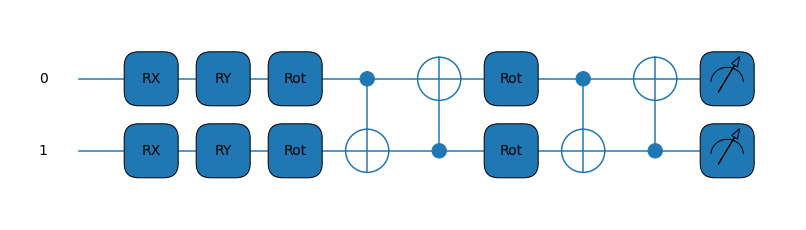

In [5]:
test.draw_circuit()

In [6]:
test.optimize()

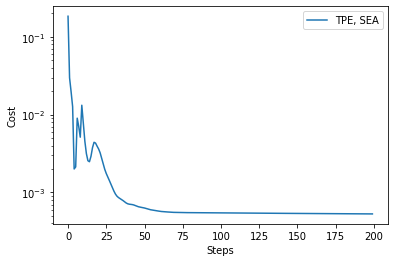

In [7]:
test.plot_cost()

In [8]:
print('accuracy ', test.accuracy(x_test, y_test))
print('optimized cost; ', test.cost_list[-1])

accuracy  1.0
optimized cost;  0.0005299799817766371


## dependence of trainability on the types of embedding, ansatz and cost function

### when cost_type is mse

In [3]:
nqubits = 2; embedding_nlayers = 1; ansatz_nlayers = 2; cost_type = 'MSE'
embedding_list = ['TPE', 'HEE', 'CHE', 'APE']
ansatz_list = ['TPA', 'HEA', 'SEA']
draw = False; shots = None; stepsize = 0.3; steps = 300

optimized_cost_acc_mse, cost_all_mse = train_each_circuit(x_train, y_train, x_test, y_test, nqubits, embedding_nlayers, ansatz_nlayers, embedding_list, ansatz_list, cost_type, draw, shots, stepsize, steps)

TPE, TPA
TPE, HEA
TPE, SEA
HEE, TPA
HEE, HEA
HEE, SEA
CHE, TPA
CHE, HEA
CHE, SEA
APE, TPA
APE, HEA
APE, SEA


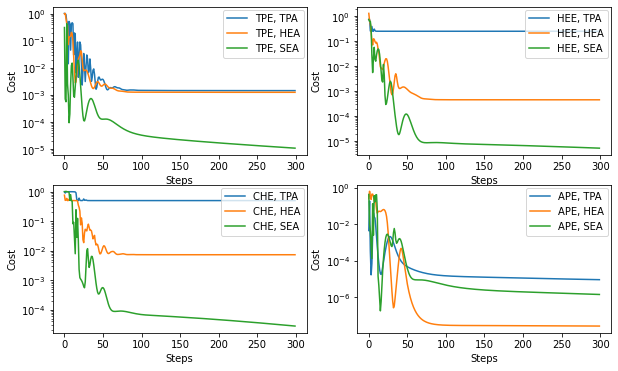

In [18]:
plot_cost(cost_all_mse)

`TPE` and `APE` seems stablly train the parameters.

In `Subtleties in the trainability of quantum machine learning models`
> Particularly, we here show that the CHE scheme can lead to poor performance for some standard benchmarking test.

In [19]:
sort_cost_acc(cost_type, optimized_cost_acc_mse)

MSE
embedding_type: APE, ansatz_type: HEA: cost 2.6215567570186914e-08
embedding_type: APE, ansatz_type: SEA: cost 1.4064480182520337e-06
embedding_type: HEE, ansatz_type: SEA: cost 5.274753679028394e-06
embedding_type: APE, ansatz_type: TPA: cost 9.081387266629048e-06
embedding_type: TPE, ansatz_type: SEA: cost 1.0942890863118415e-05
embedding_type: CHE, ansatz_type: SEA: cost 2.7869465989307722e-05
embedding_type: HEE, ansatz_type: HEA: cost 0.00045324550323364216
embedding_type: TPE, ansatz_type: HEA: cost 0.0012574518217537969
embedding_type: TPE, ansatz_type: TPA: cost 0.0014520102406898083
embedding_type: CHE, ansatz_type: HEA: cost 0.007298381753496454
embedding_type: HEE, ansatz_type: TPA: cost 0.2500037924358386
embedding_type: CHE, ansatz_type: TPA: cost 0.5000250224996841
---------------------------------------------------------------
embedding_type: TPE, ansatz_type: TPA: accuracy 1.0
embedding_type: TPE, ansatz_type: HEA: accuracy 1.0
embedding_type: TPE, ansatz_type: SEA:

### when cost_type is cross entropy

In [20]:
nqubits = 2; embedding_nlayers = 1; ansatz_nlayers = 2; cost_type = 'LOG'
embedding_list = ['TPE', 'HEE', 'CHE', 'APE']
ansatz_list = ['TPA', 'HEA', 'SEA']
draw = False; shots = None; stepsize = 0.3; steps = 300

optimized_cost_acc_log, cost_all_log = train_each_circuit(x_train, y_train, x_test, y_test, nqubits, embedding_nlayers, ansatz_nlayers, embedding_list, ansatz_list, cost_type, draw, shots, stepsize, steps)

TPE, TPA
TPE, HEA
TPE, SEA
HEE, TPA
HEE, HEA
HEE, SEA
CHE, TPA
CHE, HEA
CHE, SEA
APE, TPA
APE, HEA
APE, SEA


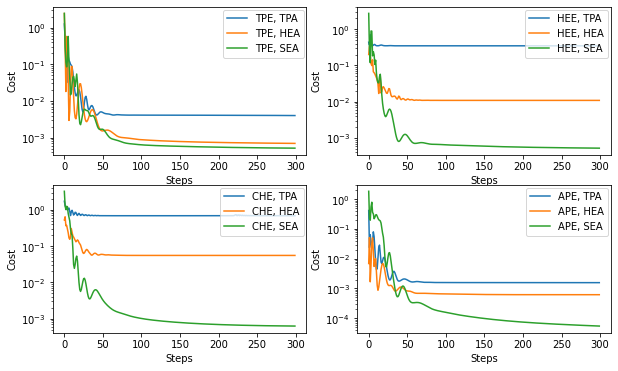

In [21]:
plot_cost(cost_all_log)

In [22]:
sort_cost_acc(cost_type, optimized_cost_acc_log)

LOG
embedding_type: APE, ansatz_type: SEA: cost 5.4470795455891984e-05
embedding_type: TPE, ansatz_type: SEA: cost 0.0005146485598148245
embedding_type: HEE, ansatz_type: SEA: cost 0.0005254196167312988
embedding_type: APE, ansatz_type: HEA: cost 0.0006181630605300977
embedding_type: CHE, ansatz_type: SEA: cost 0.0006234346320104021
embedding_type: TPE, ansatz_type: HEA: cost 0.0006944295983643338
embedding_type: APE, ansatz_type: TPA: cost 0.0015715993713403369
embedding_type: TPE, ansatz_type: TPA: cost 0.00399248988539958
embedding_type: HEE, ansatz_type: HEA: cost 0.010882304367522567
embedding_type: CHE, ansatz_type: HEA: cost 0.0552286208947618
embedding_type: HEE, ansatz_type: TPA: cost 0.3472810569162601
embedding_type: CHE, ansatz_type: TPA: cost 0.6867835699374487
---------------------------------------------------------------
embedding_type: TPE, ansatz_type: TPA: accuracy 1.0
embedding_type: TPE, ansatz_type: HEA: accuracy 1.0
embedding_type: TPE, ansatz_type: SEA: accuracy

## cost vs the number of layers of embedding

In [14]:
nqubits = 2; embedding_nlayers_list = [1,5,10,15,20,25,30]; ansatz_nlayers = 2; embedding_type = 'TPE'; ansatz_type = 'TPA'; cost_type = 'LOG'
draw = True; shots = None; stepsize = 0.3; steps = 100

optimized_cost_list = []
optimized_acc_list  = []
for embedding_nlayers in embedding_nlayers_list:
    cost_embedding_layers = quantum_classifier(x_train, y_train, nqubits, embedding_nlayers, ansatz_nlayers, embedding_type, ansatz_type, cost_type, shots, stepsize, steps)
    cost_embedding_layers.optimize()
    optimized_cost_list.append(cost_embedding_layers.cost_list[-1])
    optimized_acc_list.append(cost_embedding_layers.accuracy(x_test, y_test))

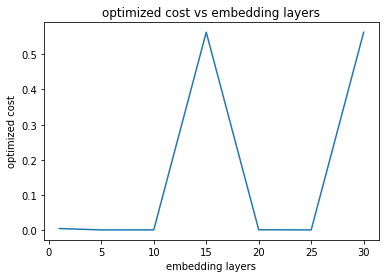

In [15]:
plt.plot(embedding_nlayers_list, optimized_cost_list)
plt.xlabel('embedding layers')
plt.ylabel('optimized cost')
plt.title('optimized cost vs embedding layers')
plt.show()

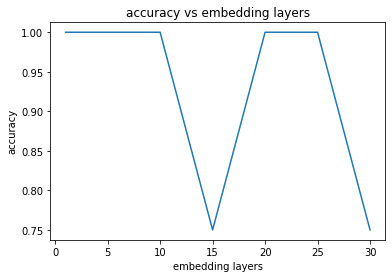

In [16]:
plt.plot(embedding_nlayers_list, optimized_acc_list)
plt.xlabel('embedding layers')
plt.ylabel('accuracy')
plt.title('accuracy vs embedding layers')
plt.show()